# SALES


Sales are activities related to selling or the number of goods sold in a given targeted time period. The delivery of a service for a cost is also considered a sale.

The seller, or the provider of the goods or services, completes a sale in response to an acquisition, appropriation,requisition, or a direct interaction with the buyer at the point of sale. There is a passing of title (property or ownership) of the item, and the settlement of a price, in which agreement is reached on a price for which transfer of ownership of the item will occur. The seller, not the purchaser, typically executes the sale and it may be completed prior to the obligation of payment. In the case of indirect interaction, a person who sells goods or service on behalf of the owner is known as a salesman or saleswoman or salesperson, but this often refers to someone selling goods in a store/shop, in which case other terms are also common, including salesclerk, shop assistant, and retail clerk.

# Data Description

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

# Loading the Data Set

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Loading the Train Data 
Train_df= pd.read_csv("bigdatamart_train.csv")

# Loading the Test Data
Test_df= pd.read_csv("bigdatamart_test.csv")

In [2]:
Train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
Test_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [4]:
Train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
Test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
Train_df.shape,Test_df.shape

((8523, 12), (5681, 11))

In [7]:
Train_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# Details about the Columns

     1. Item_Identifier : -

This Column shows the Items Unique Identification Code

     2. Item_Weight : - 

This Column shows During preprocessing we observed that this column had missing values. These missing values were imputed using the average of the column.

     3. Item_Fat_Content : -

This Column shows amount of fat contained in the product

     4. Item_Visibility : -

This Column shows Denotes visibility of products in the store. Since this variable had a small value range and no missing values, we did not apply any preprocessing steps on this variable.

     5. Item_Type : -

This Column shows Type of item we are indicating to

     6. Item_MRP : -

This Column shows holds the price of the products. During the preprocessing step we used a standard scaler to scale these values.

     7. Outlet_Identifier : -

This Column shows Outlets Unique Identification Number

     8. Outlet_Establishment_Year : -

This Column shows This describes the year of establishment of the stores. 

     9. Outlet_Size : -

This Column shows Size of the outlet whether its large or small or meduim

     10. Outlet_Location_Type : -

This Column shows Outlet location type That it is in which tyre type of the city

    11. Outlet_Type : -

This Column shows A binary column which indcates if the outlet type is a grocery store or Super market type 1 , 2 or 3.

     12. Outlet_Type : -

This Column shows the outlets type of it Wheter its a small one or a big one

# Checking for the Columns containing Null , Blank Or Empty Values

In [8]:
Train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
Test_df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Checking the presence of NULL BLANK or EMPTY VALUES through HeatMap

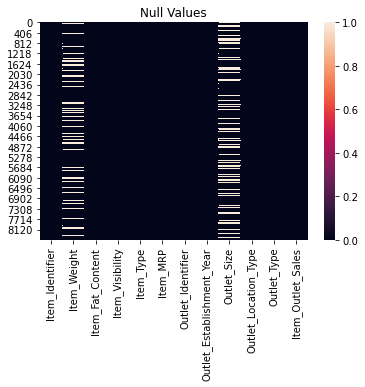

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(Train_df.isnull())
plt.title("Null Values")
plt.show()

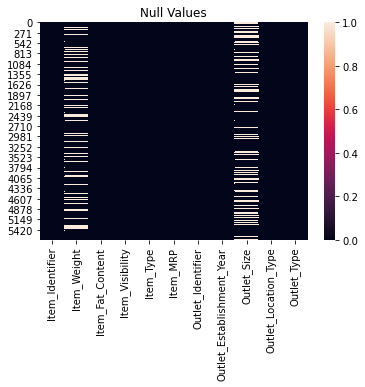

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(Test_df.isnull())
plt.title("Null Values")
plt.show()

We can see that the columns - 

* Item_Wieght
* Outlet_Size

Contains Null blank or Empty Values

For Column Item Wieght We Use ( Mean ) Method to Evaluate..
For Column Outlet_Size We Use ( Mode ) Method to Evaluate..

In [12]:
# Using Mean Method For Train and Test Data Set

import numpy as np
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan,strategy="mean")

# Changing in Training Dataset

Train_df['Item_Weight']=imp.fit_transform(Train_df['Item_Weight'].values.reshape(-1,1))

# Changing in Testing Data Set

Test_df['Item_Weight']=imp.fit_transform(Test_df['Item_Weight'].values.reshape(-1,1))


In [13]:
# Using Mode Method for Categorical Columns Of Train and Test

Train_df['Outlet_Size']=Train_df['Outlet_Size'].fillna(Train_df['Outlet_Size'].mode()[0])

Test_df['Outlet_Size']=Test_df['Outlet_Size'].fillna(Test_df['Outlet_Size'].mode()[0])

Rechecking the Columns for Null Values

In [14]:
Train_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Checking and Transforming the Data types of the Columns To Same DataTypes for Better Analysis

In [15]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [16]:
Test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


We can see that there are various types of datatypes present in the datasets..

    1. Integer -
       
 * Outlet_Establishment_Year


     2. Float -

 * Item_Weight
 * Item_Visibility
 * Item_MRP
 * Item_Outlet_Sales


    3. Object -

 * Item_Fat_Content
 * Item_Type
 * Outlet_Size	
 * Outlet_Type


    4. Alpha Numeric

   * Item_Identifier
   * Outlet_Identifier
   * Outlet_Location_Type

In [17]:
Train_df.describe(include=['O'])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,5203,3350,5577


In [18]:
Test_df.describe(include=['O'])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681,5681,5681,5681,5681,5681,5681
unique,1543,5,16,10,3,3,4
top,DRF48,Low Fat,Snack Foods,OUT027,Medium,Tier 3,Supermarket Type1
freq,8,3396,789,624,3468,2233,3717


In [19]:
Test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Deep Checking of the columns details 

In [20]:
cat_cols=Train_df.select_dtypes([object])

for col in cat_cols.columns:
    print(col)
    print(Train_df[col].value_counts())
    print('--------------------------------------------------------------------------')

Item_Identifier
FDW13    10
FDG33    10
NCJ30     9
FDT07     9
FDV38     9
         ..
FDE52     1
FDC23     1
FDT35     1
FDN52     1
FDK57     1
Name: Item_Identifier, Length: 1559, dtype: int64
--------------------------------------------------------------------------
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
--------------------------------------------------------------------------
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int6

In [21]:
Train_df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

We Can See that Same Values are Present in different Modes..

So we merge the data to reduce the variability

In [22]:
# Combining same categories 

# Train Data Set

Train_df.Item_Fat_Content=Train_df.Item_Fat_Content.replace('LF','Low Fat')
Train_df.Item_Fat_Content=Train_df.Item_Fat_Content.replace('reg','Regular')
Train_df.Item_Fat_Content=Train_df.Item_Fat_Content.replace('low fat','Low Fat')

# Test Data Set

Test_df.Item_Fat_Content=Test_df.Item_Fat_Content.replace('LF','Low Fat')
Test_df.Item_Fat_Content=Test_df.Item_Fat_Content.replace('reg','Regular')
Test_df.Item_Fat_Content=Test_df.Item_Fat_Content.replace('low fat','Low Fat')

# Encoding the Data ..


In [23]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

list1=['Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Identifier','Item_Type','Item_Fat_Content','Item_Identifier']
for val in list1:
    Train_df[val]=le.fit_transform(Train_df[val].astype(str))
    Test_df[val]=le.fit_transform(Test_df[val].astype(str))


In [24]:
Train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


# EDA

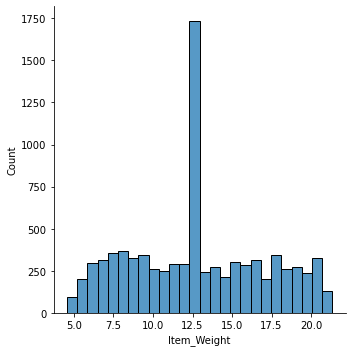

In [25]:
sns.displot(Train_df['Item_Weight'])

The plot shows that the max item wieght lies between the Range 0 to 300

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

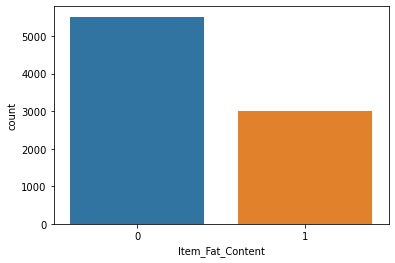

In [26]:
sns.countplot(Train_df['Item_Fat_Content'])

The plot shows that Low Fat items are more preffered in the sales showing large increase in the rate compared to regular fat

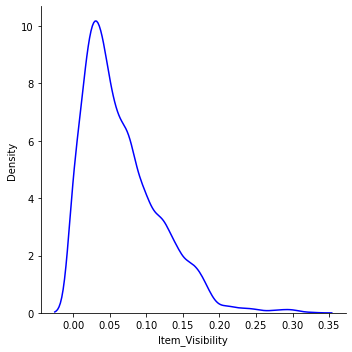

In [27]:
sns.displot(Train_df['Item_Visibility'],kind='kde',color='blue')

The plot shows that more visible the item more is the sale bt at apoint it goes down

In [28]:
Train_df['Item_Type'].value_counts()

6     1232
13    1200
9      910
5      856
4      682
3      649
0      648
8      520
14     445
10     425
1      251
7      214
11     169
15     148
2      110
12      64
Name: Item_Type, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Item_Type'>

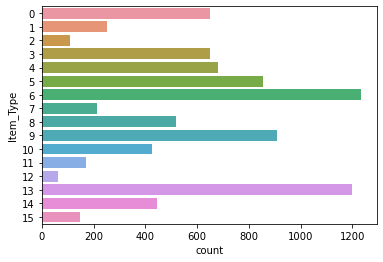

In [29]:
sns.countplot(y=Train_df['Item_Type'])

The plot shows the count of different items Quantity in stores displaying its demand

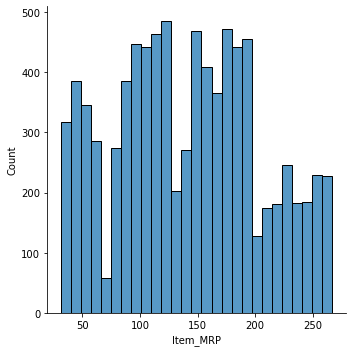

In [30]:
sns.displot(Train_df['Item_MRP'],kind='hist')

We can see that the plot is evenly plotted 

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

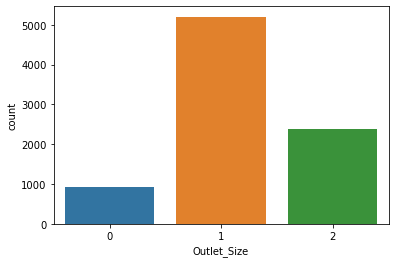

In [31]:
sns.countplot(Train_df['Outlet_Size'])

this plot shows that the outlet with meduim size is higher compared to large ones and followed by small ones

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

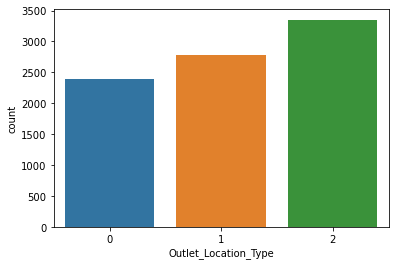

In [32]:
sns.countplot(Train_df['Outlet_Location_Type'])

It shows that the Outlet is equally distributed on all locations

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

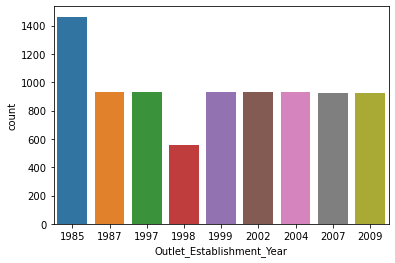

In [33]:
sns.countplot(Train_df['Outlet_Establishment_Year'])

Plot shows that the almost equal numbers of outlet are opened every year

array([[<AxesSubplot:title={'center':'Item_Identifier'}>,
        <AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Fat_Content'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>,
        <AxesSubplot:title={'center':'Item_Type'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Identifier'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>,
        <AxesSubplot:title={'center':'Outlet_Size'}>,
        <AxesSubplot:title={'center':'Outlet_Location_Type'}>],
       [<AxesSubplot:title={'center':'Outlet_Type'}>,
        <AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

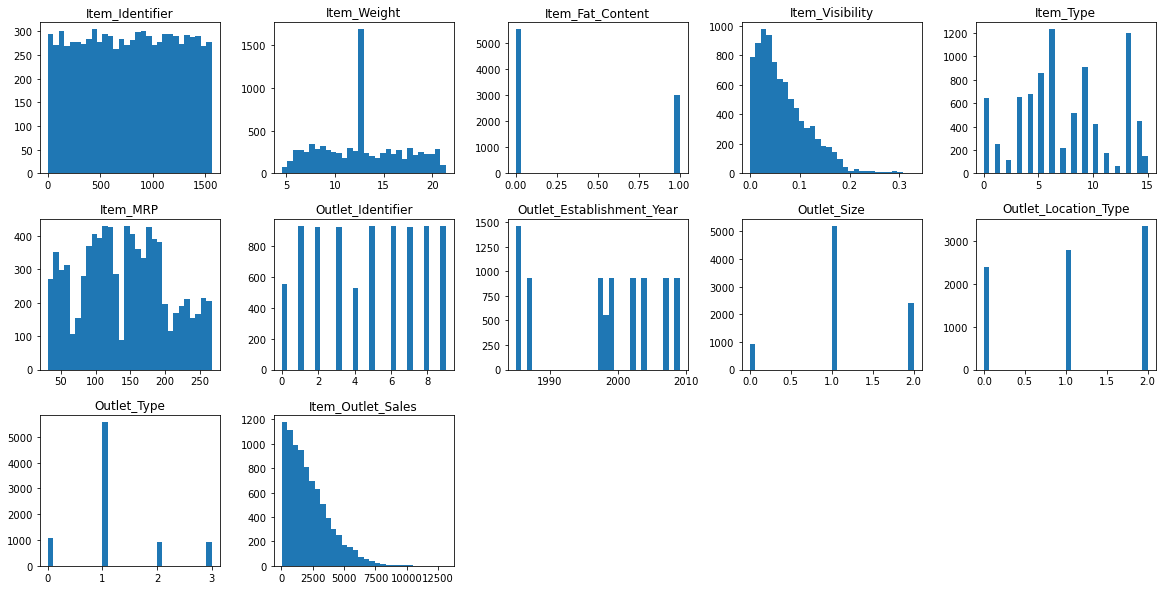

In [34]:
Train_df.hist(figsize=(20,10), grid=False, layout=(3,5), bins = 30)

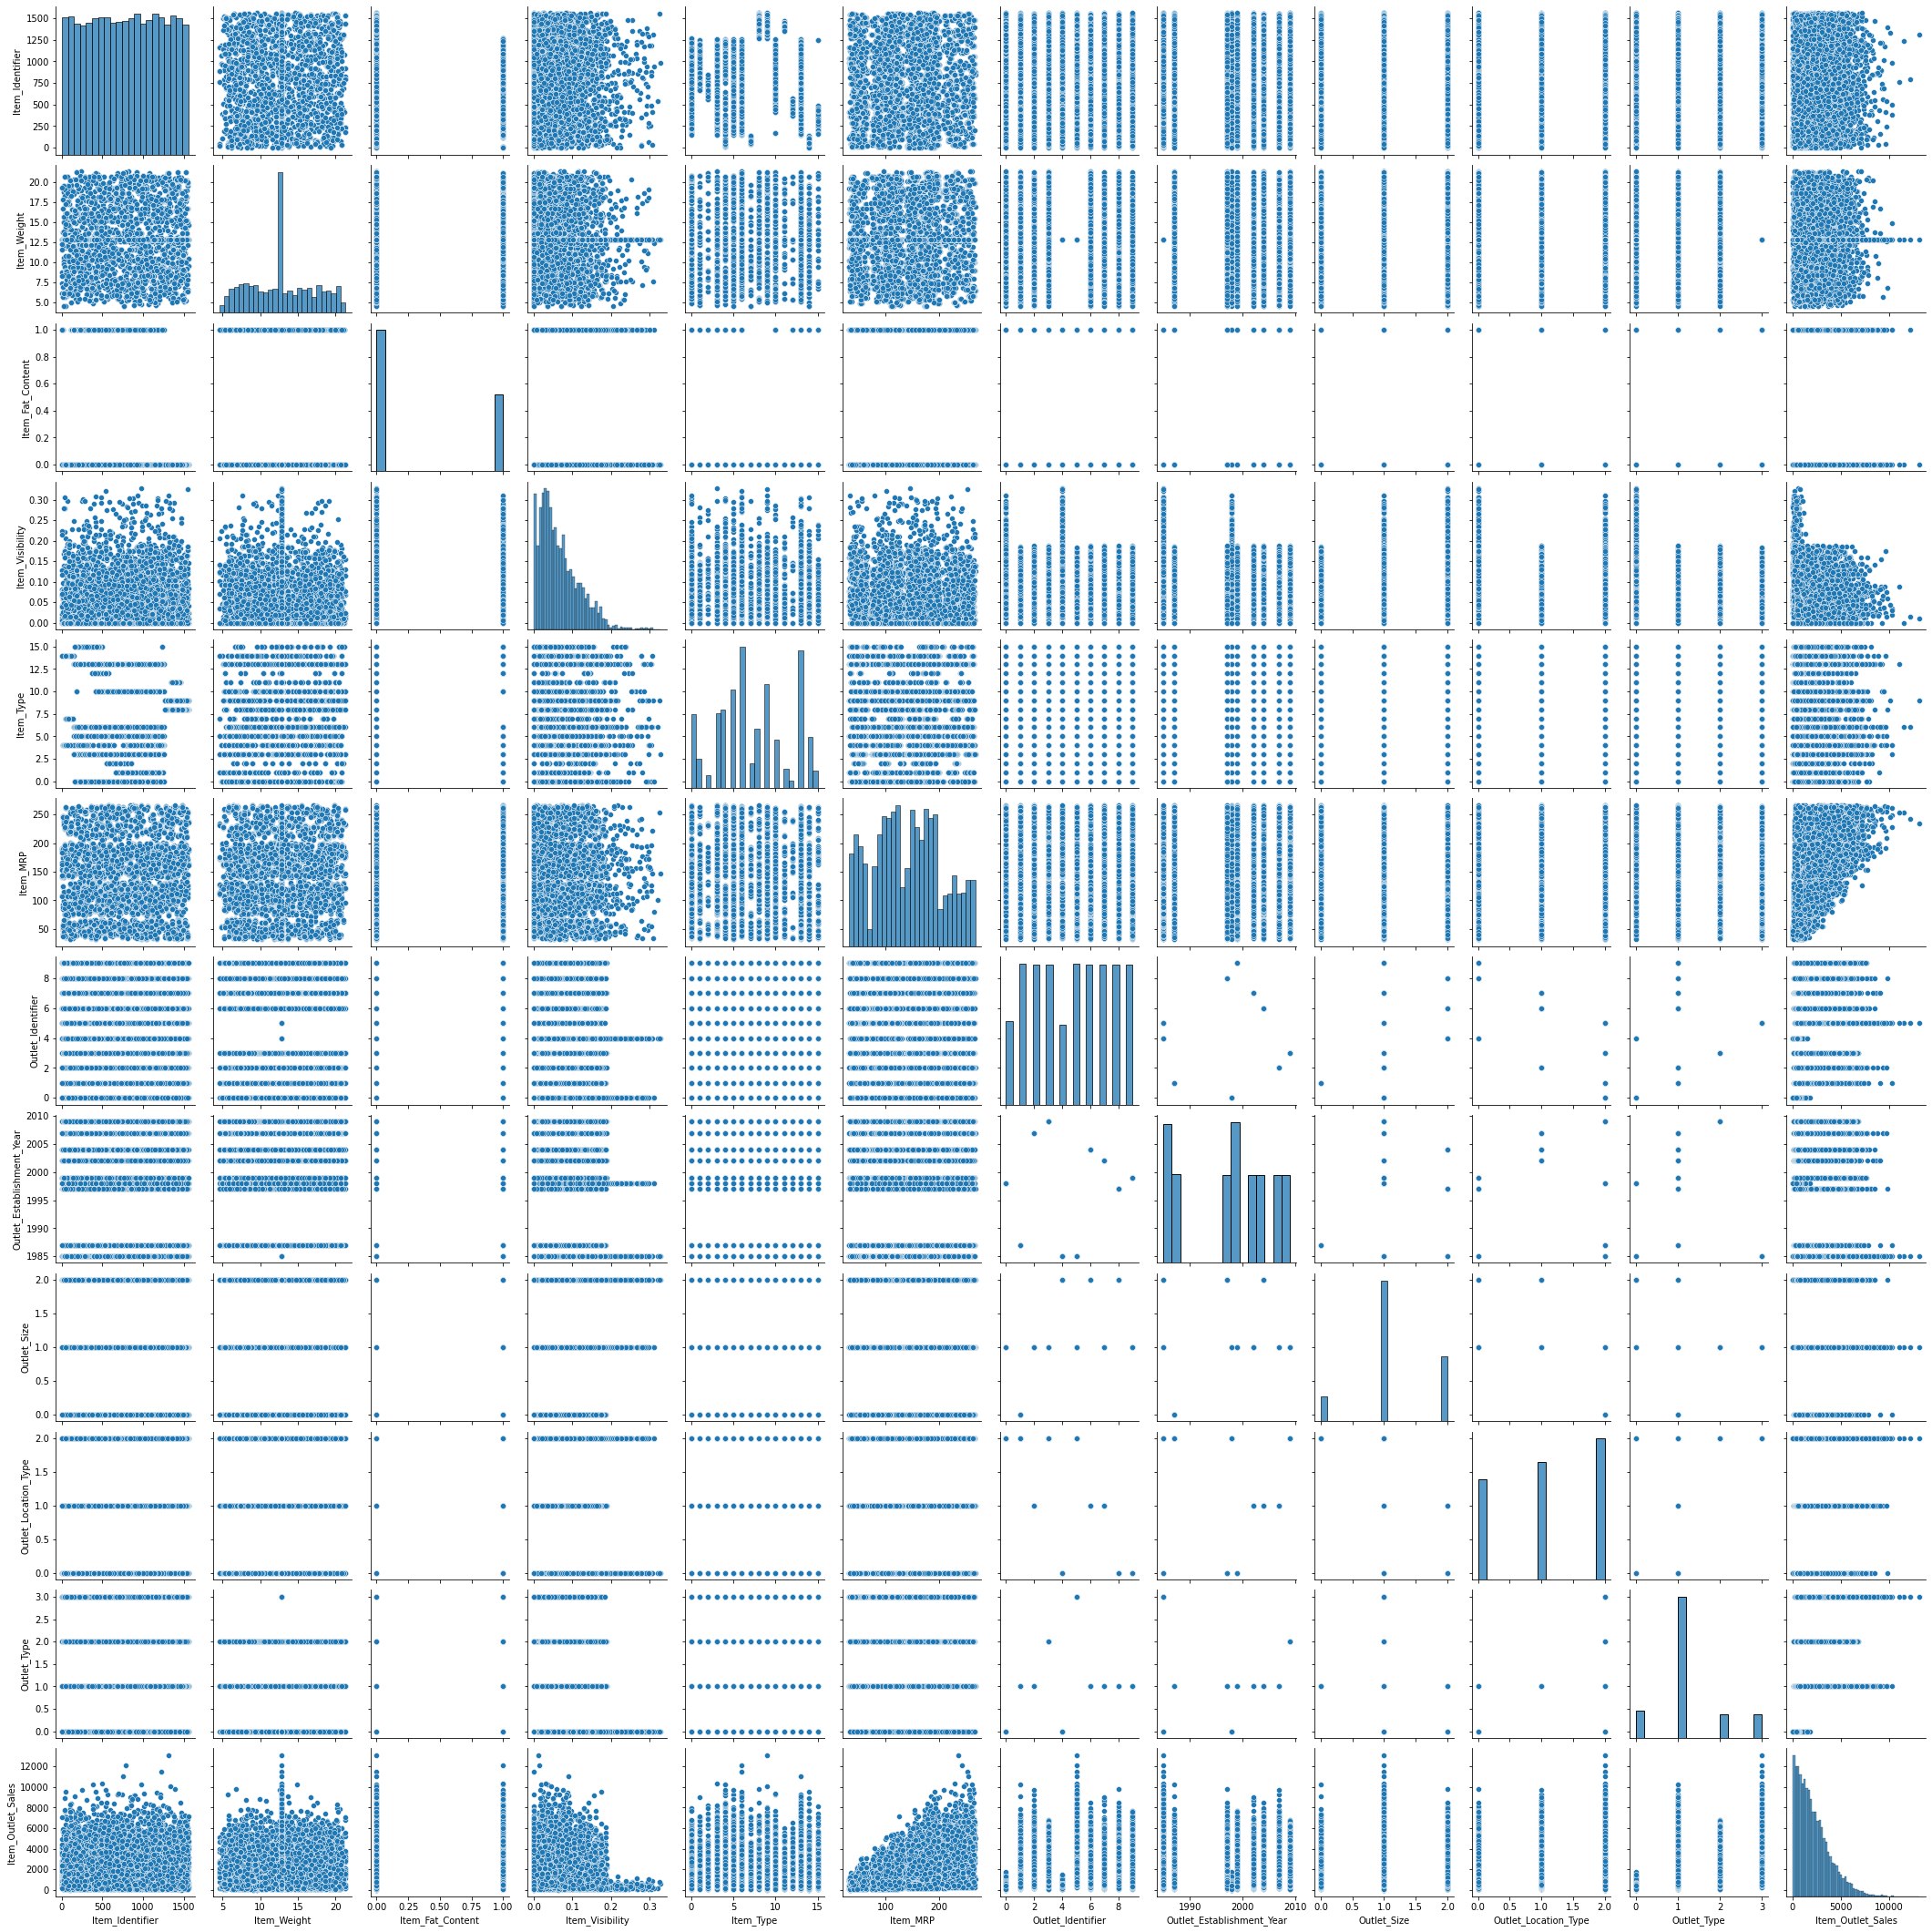

In [35]:
sns.pairplot(Train_df)

# Coorelation

In [36]:
Train_df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.114660,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001389,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.021157,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.114660,-0.021157,1.000000,0.047314,-0.139434,0.006063,0.000764,0.003151,-0.000622,-0.001598,0.002199,0.018719
Item_Visibility,-0.025482,-0.012049,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,0.006063,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,0.000764,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,0.003151,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001389,-0.007225,-0.000622,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.003656,0.004088,-0.001598,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367


In [37]:
Train_df.corr()['Item_Outlet_Sales'].sort_values()

Item_Visibility             -0.128625
Outlet_Size                 -0.086182
Outlet_Establishment_Year   -0.049135
Item_Identifier              0.002869
Item_Weight                  0.011550
Item_Type                    0.017048
Item_Fat_Content             0.018719
Outlet_Location_Type         0.089367
Outlet_Identifier            0.162325
Outlet_Type                  0.401522
Item_MRP                     0.567574
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:>

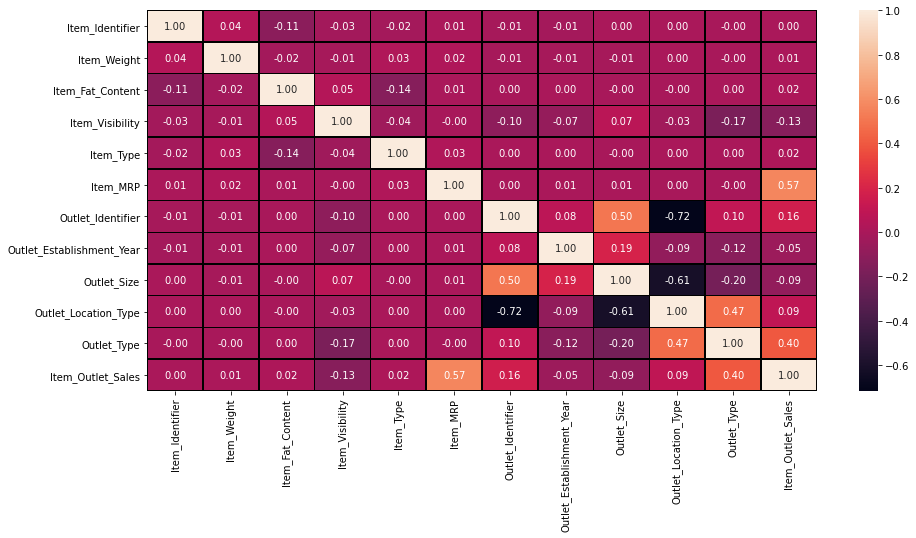

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,7))
sns.heatmap(Train_df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt='.2f')

OutCome of Coorelation : - 

* 

# Removing Columns

In [39]:
Train_df.drop(['Item_Visibility','Item_Weight','Outlet_Identifier'],axis=1,inplace=True)

# Descriptive Statistics

In [40]:
Train_df.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,0.352693,7.226681,140.992782,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,449.222377,0.477836,4.209990,62.275067,8.371760,0.600327,0.812757,0.796459,1706.499616
min,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,0.000000,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,0.000000,6.000000,143.012800,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,1167.000000,1.000000,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,1558.000000,1.000000,15.000000,266.888400,2009.000000,2.000000,2.000000,3.000000,13086.964800


<AxesSubplot:>

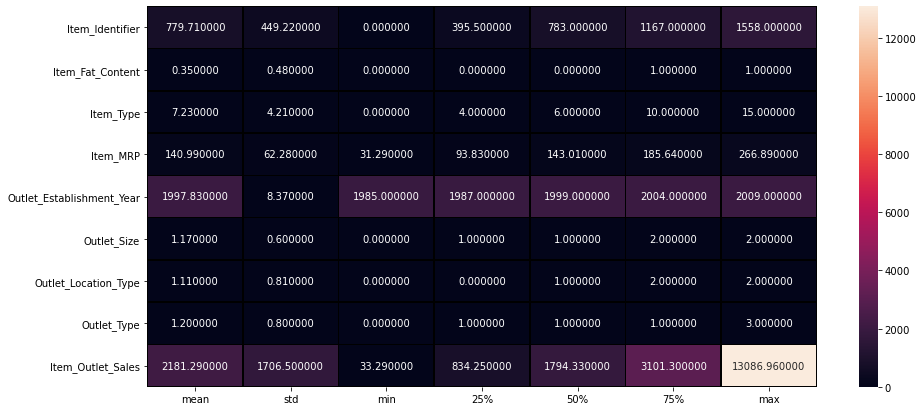

In [41]:
plt.figure(figsize=(15,7))
sns.heatmap(round(Train_df.describe()[1:].transpose(),2), annot=True, linewidths=0.5,linecolor="black", fmt='f')

In [42]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Fat_Content           8523 non-null   int32  
 2   Item_Type                  8523 non-null   int32  
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Establishment_Year  8523 non-null   int64  
 5   Outlet_Size                8523 non-null   int32  
 6   Outlet_Location_Type       8523 non-null   int32  
 7   Outlet_Type                8523 non-null   int32  
 8   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(2), int32(6), int64(1)
memory usage: 399.6 KB


# Checking Data To Remove Skewness

In [43]:
Train_df.iloc[:,:-1]

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,0,4,249.8092,1999,1,0,1
1,8,1,14,48.2692,2009,1,2,2
2,662,0,10,141.6180,1999,1,0,1
3,1121,1,6,182.0950,1998,1,2,0
4,1297,0,9,53.8614,1987,0,2,1
...,...,...,...,...,...,...,...,...
8518,370,0,13,214.5218,1987,0,2,1
8519,897,1,0,108.1570,2002,1,1,1
8520,1357,0,8,85.1224,2004,2,1,1
8521,681,1,13,103.1332,2009,1,2,2


In [44]:
Train_df.iloc[:,:-1].skew()

Item_Identifier             -0.008877
Item_Fat_Content             0.616705
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
dtype: float64

Removing Skewness Using Power Transform

In [45]:
from sklearn.preprocessing import power_transform
x_new=power_transform(Train_df.iloc[:,:-1],method='yeo-johnson')

Train_df.iloc[:,:-1]=pd.DataFrame(x_new,columns=Train_df.iloc[:,:-1].columns)

In [46]:
Train_df.iloc[:,:-1].skew()

Item_Identifier             -0.293700
Item_Fat_Content             0.616705
Item_Type                   -0.164574
Item_MRP                    -0.115386
Outlet_Establishment_Year   -0.200959
Outlet_Size                 -0.042980
Outlet_Location_Type        -0.220632
Outlet_Type                  0.007863
dtype: float64

# Outliers Checking

Item_Identifier                 AxesSubplot(0.125,0.657941;0.133621x0.222059)
Item_Fat_Content             AxesSubplot(0.285345,0.657941;0.133621x0.222059)
Item_Type                     AxesSubplot(0.44569,0.657941;0.133621x0.222059)
Item_MRP                     AxesSubplot(0.606034,0.657941;0.133621x0.222059)
Outlet_Establishment_Year    AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Outlet_Size                     AxesSubplot(0.125,0.391471;0.133621x0.222059)
Outlet_Location_Type         AxesSubplot(0.285345,0.391471;0.133621x0.222059)
Outlet_Type                   AxesSubplot(0.44569,0.391471;0.133621x0.222059)
Item_Outlet_Sales            AxesSubplot(0.606034,0.391471;0.133621x0.222059)
dtype: object

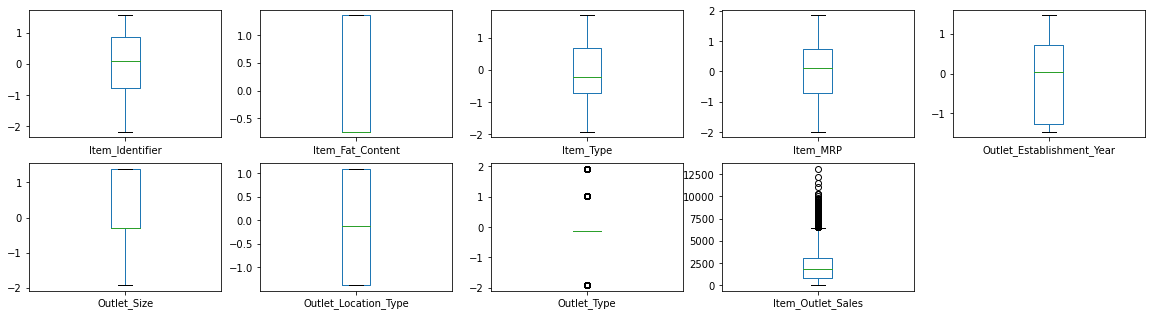

In [47]:

Train_df.plot(kind='box',subplots=True, layout=(3,5), figsize=[20,8])

# IQR Proximity Rule
Z - Score Technique

In [48]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(Train_df))
z.shape

(8523, 9)

In [49]:
threshold=3
print(np.where(z>3))

(array([ 130,  145,  276,  304,  333,  373,  456,  472,  661,  694,  753,
        809,  935,  991,  997, 1009, 1138, 1254, 1450, 1506, 1859, 1998,
       2109, 2216, 2238, 2293, 2516, 2535, 2776, 3083, 3087, 3098, 3154,
       3234, 3286, 3407, 3667, 3709, 3720, 3757, 4289, 4346, 4349, 4676,
       4681, 4772, 4888, 4961, 4991, 5065, 5177, 5185, 5223, 5315, 5500,
       5550, 5619, 5752, 5799, 5812, 5977, 6000, 6134, 6334, 6409, 6537,
       6541, 6606, 6886, 6993, 7016, 7076, 7188, 7191, 7236, 7256, 7302,
       7343, 7560, 7562, 7609, 7690, 7752, 7816, 7826, 7930, 8039, 8201,
       8245, 8447], dtype=int64), array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8], dtype=int64))


In [50]:
len(np.where(z>3)[0])

90

In [51]:
Train_df.drop([130,  145,  276,  304,  333,  373,  456,  472,  661,  694,  753,
        809,  935,  991,  997, 1009, 1138, 1254, 1450, 1506, 1859, 1998,
       2109, 2216, 2238, 2293, 2516, 2535, 2776, 3083, 3087, 3098, 3154,
       3234, 3286, 3407, 3667, 3709, 3720, 3757, 4289, 4346, 4349, 4676,
       4681, 4772, 4888, 4961, 4991, 5065, 5177, 5185, 5223, 5315, 5500,
       5550, 5619, 5752, 5799, 5812, 5977, 6000, 6134, 6334, 6409, 6537,
       6541, 6606, 6886, 6993, 7016, 7076, 7188, 7191, 7236, 7256, 7302,
       7343, 7560, 7562, 7609, 7690, 7752, 7816, 7826, 7930, 8039, 8201,
       8245, 8447],axis=0)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-1.461039,-0.738147,-0.712347,1.623670,0.048562,-0.293295,-1.373843,-0.123488,3735.1380
1,-2.093858,1.354743,1.504660,-1.595016,1.461925,-0.293295,1.088324,1.040591,443.4228
2,-0.154018,-0.738147,0.684390,0.081237,0.048562,-0.293295,-1.373843,-0.123488,2097.2700
3,0.773522,1.354743,-0.215420,0.689968,-0.075796,-0.293295,1.088324,-1.915952,732.3800
4,1.098294,-0.738147,0.468410,-1.476078,-1.270835,-1.925925,1.088324,-0.123488,994.7052
...,...,...,...,...,...,...,...,...,...
8518,-0.844393,-0.738147,1.305304,1.148258,-1.270835,-1.925925,1.088324,-0.123488,2778.3834
8519,0.338073,1.354743,-1.923750,-0.463127,0.439191,-0.293295,-0.131113,-0.123488,549.2850
8520,1.206073,-0.738147,0.246996,-0.867930,0.714912,1.390694,-0.131113,-0.123488,1193.1136
8521,-0.112559,1.354743,1.305304,-0.548996,1.461925,-0.293295,1.088324,1.040591,1845.5976


In [52]:
Train_df=Train_df[(z<3).all(axis=1)]

In [53]:
Train_df.shape

(8433, 9)

# Feature Engineering ( Variantion Inflation Factor )

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
Train_df.corr()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,-0.079993,-0.032958,0.017657,-0.011585,0.000439,0.003751,-0.005244,0.007337
Item_Fat_Content,-0.079993,1.000000,-0.144189,0.006465,0.003495,-0.000898,-0.002206,0.002262,0.020195
Item_Type,-0.032958,-0.144189,1.000000,0.038513,0.005571,-0.001996,0.002638,0.002423,0.018842
Item_MRP,0.017657,0.006465,0.038513,1.000000,0.015850,0.009649,-0.008098,-0.016624,0.564049
Outlet_Establishment_Year,-0.011585,0.003495,0.005571,0.015850,1.000000,0.167464,-0.032301,0.049828,-0.007602
Outlet_Size,0.000439,-0.000898,-0.001996,0.009649,0.167464,1.000000,-0.614542,-0.222732,-0.084767
Outlet_Location_Type,0.003751,-0.002206,0.002638,-0.008098,-0.032301,-0.614542,1.000000,0.400313,0.069566
Outlet_Type,-0.005244,0.002262,0.002423,-0.016624,0.049828,-0.222732,0.400313,1.000000,0.418901
Item_Outlet_Sales,0.007337,0.020195,0.018842,0.564049,-0.007602,-0.084767,0.069566,0.418901,1.000000


<AxesSubplot:>

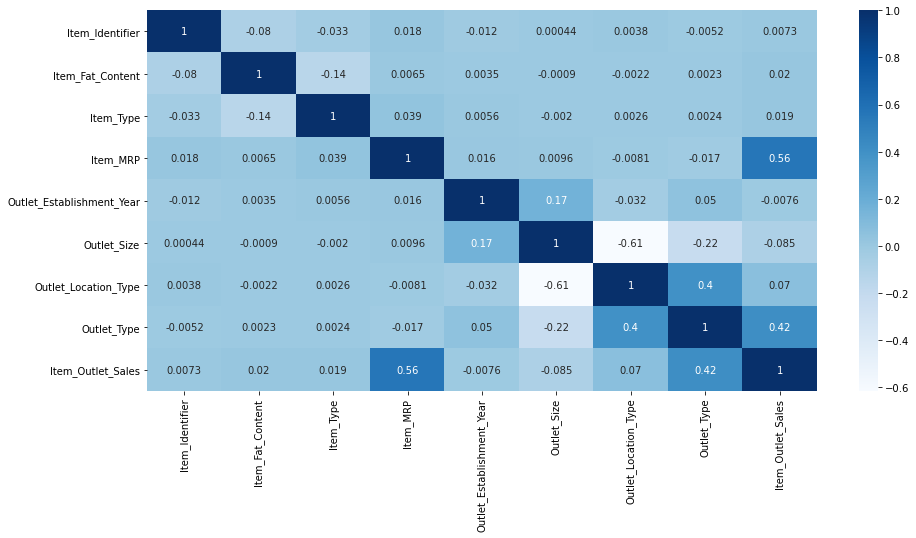

In [56]:
import seaborn as sns
plt.figure(figsize=(15,7))
sns.heatmap(Train_df.corr(),cmap="Blues",annot=True)

In [57]:
# independent Column
x=Train_df.iloc[:,:-1]
# target
y=Train_df.iloc[:,-1]

In [58]:
x

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-1.461039,-0.738147,-0.712347,1.623670,0.048562,-0.293295,-1.373843,-0.123488
1,-2.093858,1.354743,1.504660,-1.595016,1.461925,-0.293295,1.088324,1.040591
2,-0.154018,-0.738147,0.684390,0.081237,0.048562,-0.293295,-1.373843,-0.123488
3,0.773522,1.354743,-0.215420,0.689968,-0.075796,-0.293295,1.088324,-1.915952
4,1.098294,-0.738147,0.468410,-1.476078,-1.270835,-1.925925,1.088324,-0.123488
...,...,...,...,...,...,...,...,...
8518,-0.844393,-0.738147,1.305304,1.148258,-1.270835,-1.925925,1.088324,-0.123488
8519,0.338073,1.354743,-1.923750,-0.463127,0.439191,-0.293295,-0.131113,-0.123488
8520,1.206073,-0.738147,0.246996,-0.867930,0.714912,1.390694,-0.131113,-0.123488
8521,-0.112559,1.354743,1.305304,-0.548996,1.461925,-0.293295,1.088324,1.040591


In [59]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8433, dtype: float64

In [60]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [61]:
vif_calc()

   VIF Factor                   features
0    1.009107            Item_Identifier
1    1.029016           Item_Fat_Content
2    1.025058                  Item_Type
3    1.002595                   Item_MRP
4    1.042043  Outlet_Establishment_Year
5    1.665940                Outlet_Size
6    1.828113       Outlet_Location_Type
7    1.197308                Outlet_Type


# Scaling the Data

In [62]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.46041045, -0.73809784, -0.71149757, ..., -0.29476771,
        -1.36724661, -0.1111303 ],
       [-2.09271523,  1.35483393,  1.50458802, ..., -0.29476771,
         1.09532557,  1.06229529],
       [-0.15445344, -0.73809784,  0.68465936, ..., -0.29476771,
        -1.36724661, -0.1111303 ],
       ...,
       [ 1.2045313 , -0.73809784,  0.24744661, ...,  1.38450217,
        -0.1243127 , -0.1111303 ],
       [-0.11302774,  1.35483393,  1.30531546, ..., -0.29476771,
         1.09532557,  1.06229529],
       [-1.86150182, -0.73809784,  1.50458802, ...,  1.38450217,
        -1.36724661, -0.1111303 ]])

### saving best random state 

### As the Outcome is Price Value which is in Integer abd Float So we use Linear Regression Model

In [63]:
from sklearn.model_selection import train_test_split
maxscor=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    from sklearn.linear_model import LinearRegression
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    sco=lm.score(x_train,y_train)
    if sco>maxscor:
        maxscor=sco
        maxRS=i

print("best accuracy  is ",maxscor, "with random state ",maxRS)

best accuracy  is  0.5332202437759546 with random state  21


In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=21)

In [65]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score


# Linear Regression

In [66]:
lm=LinearRegression()
lm.fit(x_train,y_train)
pred1=lm.predict(x_test)
sc1=lm.score(x_train,y_train)
print(sc1)


print('Error:')
print('Mean Absolute Error :',mean_absolute_error(y_test,pred1))
print('Mean Squared Error :',mean_squared_error(y_test,pred1))
print('Root mean Squared Error',np.sqrt(mean_squared_error(y_test,pred1)))
print('r2 score :',r2_score(y_test,pred1)*100)
print(" End of  details","\n ")

0.524812265036033
Error:
Mean Absolute Error : 860.3023313198005
Mean Squared Error : 1249782.7174450841
Root mean Squared Error 1117.936812814161
r2 score : 49.51947923475082
 End of  details 
 


# Lasso 

In [67]:

ls=Lasso(alpha=0.000001)
ls.fit(x_train,y_train)
pred2=ls.predict(x_test)
sc2=ls.score(x_train,y_train)
print(sc2)


print('Error:')
print('Mean Absolute Error :',mean_absolute_error(y_test,pred2))
print('Mean Squared Error :',mean_squared_error(y_test,pred2))
print('Root mean Squared Error',np.sqrt(mean_squared_error(y_test,pred2)))
print('r2 score :',r2_score(y_test,pred2)*100)
print(" End of  details","\n ")

0.524812265036033
Error:
Mean Absolute Error : 860.3023312909793
Mean Squared Error : 1249782.7176850925
Root mean Squared Error 1117.9368129215052
r2 score : 49.51947922505653
 End of  details 
 


# Ridge 

In [68]:
rd=Ridge(alpha=0.000001)
rd.fit(x_train,y_train)
pred3=rd.predict(x_test)
sc3=rd.score(x_train,y_train)
print(sc3)





0.524812265036033


# Elastic net

In [69]:

en=ElasticNet(alpha=0.000001)
en.fit(x_train,y_train)
pred4=en.predict(x_test)
sc4=en.score(x_train,y_train)
print(sc4)


print('Error:')
print('Mean Absolute Error :',mean_absolute_error(y_test,pred4))
print('Mean Squared Error :',mean_squared_error(y_test,pred4))
print('Root mean Squared Error',np.sqrt(mean_squared_error(y_test,pred4)))
print('r2 score :',r2_score(y_test,pred4)*100)
print(" End of  details","\n ")

0.5248122650358389
Error:
Mean Absolute Error : 860.3022876558501
Mean Squared Error : 1249782.6967476397
Root mean Squared Error 1117.9368035571777
r2 score : 49.519480070750355
 End of  details 
 


# Best score

In [70]:
score_list =[sc1,sc2,sc3,sc4]
score_list.index(max(score_list))

0

In [71]:
score_list

[0.524812265036033, 0.524812265036033, 0.524812265036033, 0.5248122650358389]

In [72]:
#observation - linear regression is gving  the highest score 

## Cross validation

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
models=[lm,ls,rd,en]
for i in models:
    print (i , cross_val_score(i,x,y,cv=5).mean())

LinearRegression() 0.5173981318102229
Lasso(alpha=1e-06) 0.5173981318503906
Ridge(alpha=1e-06) 0.5173981318108689
ElasticNet(alpha=1e-06) 0.5173981340095983


## Comapring score  with CV score 

In [75]:
Diff=[]
models=[lm,ls,rd,en]
for i in models:
    Diff.append(cross_val_score(i,x,y,cv=5).mean()-i.score(x_train,y_train))
    
    
a=Diff.index(min(Diff))
print(Diff)
print(a)

    
    

[-0.007414133225810082, -0.007414133185642324, -0.0074141332251640435, -0.007414131026240556]
0


Observation - Linear regressin give the best value  . 

# Hyper parameter tuning 

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
lm.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [78]:
parameters={"copy_X":["True","False"],
             "fit_intercept":["True","False"],
           "n_jobs":np.arange(1,5)}

In [79]:
GCV=GridSearchCV(LinearRegression(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': ['True', 'False'],
                         'fit_intercept': ['True', 'False'],
                         'n_jobs': array([1, 2, 3, 4])})

In [80]:
GCV.best_params_

{'copy_X': 'True', 'fit_intercept': 'True', 'n_jobs': 1}

In [81]:
fin_mod=LinearRegression(copy_X= 'True', fit_intercept= 'True', n_jobs= 1)
fin_mod.fit(x_train ,y_train)
pred=fin_mod.predict(x_test)
scoree=fin_mod.score(x_train,y_train)
print(scoree)

0.524812265036033


# SAVING FINAL MODEL 

In [82]:
import joblib
joblib.dump(fin_mod,"BIG_DATA_MART_SALES.pkl")

['BIG_DATA_MART_SALES.pkl']